In [ ]:
!pip install mediapipe
!pip install pycocotools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 822.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
import numpy as np
import time

In [ ]:
!mkdir coco
!cd coco
!mkdir images
!cd images

#!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
#!wget http://images.cocodataset.org/zips/test2017.zip
#!wget http://images.cocodataset.org/zips/unlabeled2017.zip

#!unzip train2017.zip
!unzip val2017.zip
#!unzip test2017.zip
#!unzip unlabeled2017.zip

#!rm train2017.zip
!rm val2017.zip
#!rm test2017.zip
#!rm unlabeled2017.zip

!cd ../
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
!wget http://images.cocodataset.org/annotations/image_info_test2017.zip
#!wget http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip

!unzip annotations_trainval2017.zip
!unzip stuff_annotations_trainval2017.zip
!unzip image_info_test2017.zip
#!unzip image_info_unlabeled2017.zip

!rm annotations_trainval2017.zip
!rm stuff_annotations_trainval2017.zip
!rm image_info_test2017.zip
#!rm image_info_unlabeled2017.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: val2017/000000143931.jpg  
 extracting: val2017/000000555005.jpg  
 extracting: val2017/000000142472.jpg  
 extracting: val2017/000000246883.jpg  
 extracting: val2017/000000459272.jpg  
 extracting: val2017/000000356261.jpg  
 extracting: val2017/000000169996.jpg  
 extracting: val2017/000000311909.jpg  
 extracting: val2017/000000253433.jpg  
 extracting: val2017/000000396568.jpg  
 extracting: val2017/000000089045.jpg  
 extracting: val2017/000000387383.jpg  
 extracting: val2017/000000095155.jpg  
 extracting: val2017/000000036494.jpg  
 extracting: val2017/000000495054.jpg  
 extracting: val2017/000000297595.jpg  
 extracting: val2017/000000030213.jpg  
 extracting: val2017/000000357903.jpg  
 extracting: val2017/000000231237.jpg  
 extracting: val2017/000000182805.jpg  
 extracting: val2017/000000147740.jpg  
 extracting: val2017/000000424721.jpg  
 extracting: val2017/000000165257.jpg  
 extracting:

In [ ]:
from pycocotools.coco import COCO

# Path to the json file of the COCO dataset annotations
dataDir = 'val2017'
annFile = 'annotations/person_keypoints_val2017.json'.format(dataDir)

# Initialization of a COCO object to work with a dataset
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


In [ ]:
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)

# Getting keypoints information from the first image
img = coco.loadImgs(imgIds[0])[0]
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [ ]:
img

{'license': 3,
 'file_name': '000000532481.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-20 16:28:24',
 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
 'id': 532481}

In [ ]:
len(anns[0]['keypoints'])

51

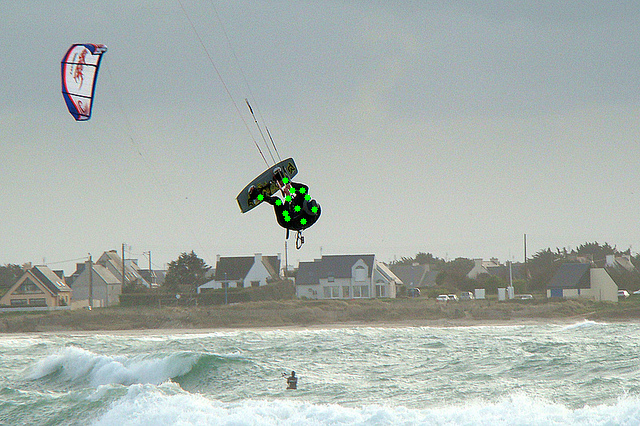

In [ ]:
# Uploading an image
img_path = 'val2017/{}'.format(img['file_name'])
image = cv2.imread(img_path)

# Keypoints display
for annotation in anns:
    keypoints = annotation['keypoints']
    for i in range(0, len(keypoints), 3):
        x = int(keypoints[i])
        y = int(keypoints[i + 1])
        if keypoints[i + 2] == 2:  # visible keypoints
            cv2.circle(image, (x, y), 3, (0, 255, 0), -1)

# Image display with keypoints
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Качество модели mediapipe

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
keypoints_dict = [0, 1, 2, 7, 8, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28]
not_found = 0
found = 0
deviation = 0

In [ ]:
def euclidean_distance(vector1, vector2, image_shape):
    image_height, image_width, _ = image_shape
    vector2[0] = int(vector2[0] * image_width)
    vector2[1] = int(vector2[1] * image_width)
    if vector2[0] > image_width or vector2[0] < 0:
      vector2[0] = 0
    if vector2[1] > image_height or vector2[1] < 0:
      vector2[1] = 0
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    return np.sqrt(np.sum((vector1 - vector2)**2))

In [ ]:
start_time = time.time()
for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    annIds = coco.getAnnIds(imgId, catIds=catIds)
    anns = coco.loadAnns(annIds)[0]

    # Download Image from COCO Datacet
    img_path = 'val2017/{}'.format(img['file_name'])
    image = cv2.imread(img_path)

    # Transfer image to mediapipe model to predict key points
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = anns['keypoints']

    #keypoint_coords = [(keypoints[i], keypoints[i + 1]) for i in range(0, len(keypoints), 3)]
    #keypoint_coords_filtered = [point for point in keypoint_coords if point[0] != 0 and point[1] != 0]

    if results.pose_landmarks is not None:
      lm = results.pose_landmarks.landmark
      for i in range(0, len(keypoints), 3):
        vector1 = [keypoints[i], keypoints[i + 1]]
        ind = keypoints_dict[i//3]
        vector2 = [lm[ind].x, lm[ind].y]
        dist = euclidean_distance(vector1, vector2, image.shape)
        deviation += dist
        found += 1
    else:
      not_found += 1

    # Visualization of the predicted key points in the image
    #annotated_image = image.copy()
    #if results.pose_landmarks is not None:
        #mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display image with predicted key points
    #cv2_imshow(annotated_image)
    #cv2.waitKey(0)
end_time = time.time()
cv2.destroyAllWindows()
execution_time = end_time - start_time
print(f"Время выполнения цикла: {execution_time} секунд\nНайдено: {found}\nНе найдено: {not_found}\n mse: {deviation/found}")

Время выполнения цикла: 202.09101819992065 секунд
Найдено: 26350
Не найдено: 1151
 mse: 232.40924197019388


#Качество модели MoveNet

In [ ]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed

In [ ]:
model_names = ["tflite_movenet_lightning_f16", "tflite_movenet_thunder_f16", "tflite_movenet_lightning_int8", "tflite_movenet_thunder_int8", "movenet_lightning", "movenet_thunder"]
res_dict = {}
for model in model_names:
  res_dict[model] = {}
  res_dict[model]['not_found'] = 0
  res_dict[model]['found'] = 0
  res_dict[model]['deviation'] = 0

In [ ]:
class MoveNetModel:
  def __init__(self, model_name):
    self.model_name = model_name
    if "tflite" in model_name:
      if "movenet_lightning_f16" in model_name:
        !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/float16/4?lite-format=tflite
        self.input_size = 192
      elif "movenet_thunder_f16" in model_name:
        !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
        self.input_size = 256
      elif "movenet_lightning_int8" in model_name:
        !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/int8/4?lite-format=tflite
        self.input_size = 192
      elif "movenet_thunder_int8" in model_name:
        !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/int8/4?lite-format=tflite
        self.input_size = 256
      else:
        raise ValueError("Unsupported model name: %s" % model_name)
      self.interpreter = tf.lite.Interpreter(model_path="model.tflite")
      self.interpreter.allocate_tensors()
    else:
      if "movenet_lightning" in model_name:
        self.module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
        self.input_size = 192
      elif "movenet_thunder" in model_name:
        self.module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
        self.input_size = 256
      else:
        raise ValueError("Unsupported model name: %s" % model_name)

  def movenet(self, input_image):
    input_image = tf.image.resize_with_pad(np.expand_dims(input_image, axis=0), self.input_size,self.input_size)
    if "tflite" in model_name:
      # TF Lite format expects tensor type of uint8.
      input_image = tf.cast(input_image, dtype=tf.uint8)
      input_details = self.interpreter.get_input_details()
      output_details = self.interpreter.get_output_details()
      self.interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
      # Invoke inference.
      self.interpreter.invoke()
      # Get the model prediction.
      keypoints_with_scores = self.interpreter.get_tensor(output_details[0]['index'])
    else:
      model = self.module.signatures['serving_default']
      # SavedModel format expects tensor type of int32.
      input_image = tf.cast(input_image, dtype=tf.int32)
      # Run model inference.
      outputs = model(input_image)
      # Output is a [1, 1, 17, 3] tensor.
      keypoints_with_scores = outputs['output_0'].numpy()
    return keypoints_with_scores[0][0]

In [ ]:
for model_name in model_names:
  movenet_model = MoveNetModel(model_name)
  start_time = time.time()
  for imgId in imgIds:
      img = coco.loadImgs(imgId)[0]
      annIds = coco.getAnnIds(imgId, catIds=catIds)
      anns = coco.loadAnns(annIds)[0]

      img_path = 'val2017/{}'.format(img['file_name'])
      image = cv2.imread(img_path)
      keypoints = anns['keypoints']
      model_keypoints = movenet_model.movenet(image)
      for i in range(0, len(keypoints), 3):
          vector1 = [keypoints[i], keypoints[i + 1]]
          ind = i//3
          vector2 = [model_keypoints[ind][0], model_keypoints[ind][1]]
          dist = euclidean_distance(vector1, vector2, image.shape)
          res_dict[model_name]['deviation'] += dist
          res_dict[model_name]['found'] += 1
  end_time = time.time()
  cv2.destroyAllWindows()
  execution_time = end_time - start_time
  print(f"Модель: {model_name}\nВремя выполнения цикла: {execution_time} секунд\nНайдено: {res_dict[model_name]['found']}\nНе найдено: {res_dict[model_name]['not_found']}\nсреднее отклонение в пикселях: {res_dict[model_name]['deviation']/res_dict[model_name]['found']}\n")

Модель: tflite_movenet_lightning_f16
Время выполнения цикла: 90.64985847473145 секунд
Найдено: 45781
Не найдено: 0
среднее отклонение в пикселях: 283.1256828542672

Модель: tflite_movenet_thunder_f16
Время выполнения цикла: 240.68922877311707 секунд
Найдено: 45781
Не найдено: 0
среднее отклонение в пикселях: 279.4979858986256

Модель: tflite_movenet_lightning_int8
Время выполнения цикла: 112.40286779403687 секунд
Найдено: 45781
Не найдено: 0
среднее отклонение в пикселях: 282.60483358652215

Модель: tflite_movenet_thunder_int8
Время выполнения цикла: 299.59708976745605 секунд
Найдено: 45781
Не найдено: 0
среднее отклонение в пикселях: 279.7552895249155

Модель: movenet_lightning
Время выполнения цикла: 148.85051560401917 секунд
Найдено: 45781
Не найдено: 0
среднее отклонение в пикселях: 283.1132769678824

Модель: movenet_thunder
Время выполнения цикла: 348.3304977416992 секунд
Найдено: 45781
Не найдено: 0
среднее отклонение в пикселях: 279.65774424748645



#Качество модели YOLO-NAS

In [ ]:
!pip install -q git+https://github.com/Deci-AI/super-gradients.git@stable
!pip install -q roboflow
!pip install -q supervision

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.4 MB/s eta 0:00:00
  Preparing metad

In [ ]:
import super_gradients
from super_gradients.training import models
from super_gradients.training.utils.visualization.pose_estimation import PoseVisualization
import cv2
import torch

The console stream is logged into /root/sg_logs/console.log


[2024-04-03 20:10:37] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-04-03 20:10:53] INFO - env_sanity_check.py - Library check is not supported when super_gradients installed through "git+https://github.com/..." command


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = super_gradients.training.models.get("yolo_nas_pose_l",
                            pretrained_weights="coco_pose").to(device)

[2024-04-03 20:10:56] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco_pose dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-04-03 20:10:56] INFO - checkpoint_utils.py - License Notification: YOLO-NAS-POSE pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS-POSE.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_pose_l_coco_pose.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_pose_l_coco_pose.pth
100%|██████████| 304M/304M [00:03<00:00, 105MB/s] 
[20

In [ ]:
found_yolo = 0
deviation_yolo = 0
not_found_yolo = 0

In [ ]:
start_time = time.time()
for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    annIds = coco.getAnnIds(imgId, catIds=catIds)
    anns = coco.loadAnns(annIds)[0]

    img_path = 'val2017/{}'.format(img['file_name'])
    image = cv2.imread(img_path)
    image = cv2.resize(image, (700, 500))
    model_predictions  = model.predict(image, conf=0.5)
    prediction = model_predictions.prediction
    keypoints = anns['keypoints']
    if len(prediction.poses) > 0:
      poses  = prediction.poses[0]
      for i in range(0, len(keypoints), 3):
        vector1 = [keypoints[i], keypoints[i + 1]]
        ind = i//3
        vector2 = [poses[ind][0], poses[ind][1]]
        dist = euclidean_distance(vector1, vector2, image.shape)
        deviation_yolo += dist
        found_yolo += 1
    else:
      not_found_yolo += 1

end_time = time.time()
cv2.destroyAllWindows()
execution_time = end_time - start_time
print(f"Время выполнения цикла: {execution_time} секунд\nНайдено: {found_yolo}\nНе найдено: {not_found_yolo}\nсреднее отклонение в пикселях: {deviation_yolo/found_yolo}")

[2024-04-03 20:11:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-04-03 20:11:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-04-03 20:11:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-04-03 20:11:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-04-03 20:11:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-04-03 20:11:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-04-03 20:11:16] INFO -

In [ ]:
print(f"Время выполнения цикла: {execution_time} секунд\nНайдено: {found_yolo}\nНе найдено: {not_found_yolo}\nсреднее отклонение в пикселях: {deviation_yolo/found_yolo}")

Время выполнения цикла: 1342.9465072154999 секунд
Найдено: 33694
Не найдено: 711
среднее отклонение в пикселях: 273.0888701084149


# Обработка результатов

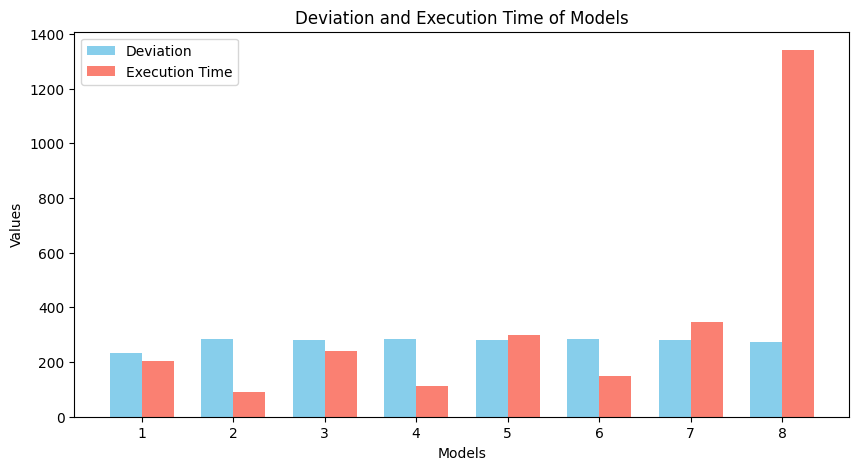

In [ ]:
import matplotlib.pyplot as plt

models_data = [
    {"model_name": "1", "deviation": 232.4, "execution_time": 202},
    {"model_name": "2", "deviation": 283.1, "execution_time": 91},
    {"model_name": "3", "deviation": 279.5, "execution_time": 241},
    {"model_name": "4", "deviation": 282.6, "execution_time": 112},
    {"model_name": "5", "deviation": 279.8, "execution_time": 300},
    {"model_name": "6", "deviation": 283.1, "execution_time": 149},
    {"model_name": "7", "deviation": 279.7, "execution_time": 348},
    {"model_name": "8", "deviation": 273.1, "execution_time": 1341},
]

# Extracting Data for Charting
model_names = [model["model_name"] for model in models_data]
qualities = [model["deviation"] for model in models_data]
execution_times = [model["execution_time"] for model in models_data]

# Constructing bar charts on a single graph
plt.figure(figsize=(10, 5))

bar_width = 0.35
bar_index = range(len(models_data))

plt.bar([i - bar_width/2 for i in bar_index], qualities, width=bar_width, color='skyblue', label='Deviation')
plt.bar([i + bar_width/2 for i in bar_index], execution_times, width=bar_width, color='salmon', label='Execution Time')

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Deviation and Execution Time of Models')
plt.xticks(bar_index, model_names)
plt.legend()

plt.show()



1.   mediapipe
2.   tflite_movenet_lightning_f16
3.   tflite_movenet_thunder_f16
4.   tflite_movenet_lightning_int8
5.   tflite_movenet_thunder_int8
6.   movenet_lightning
7.   movenet_thunder
8.   yolo-nas

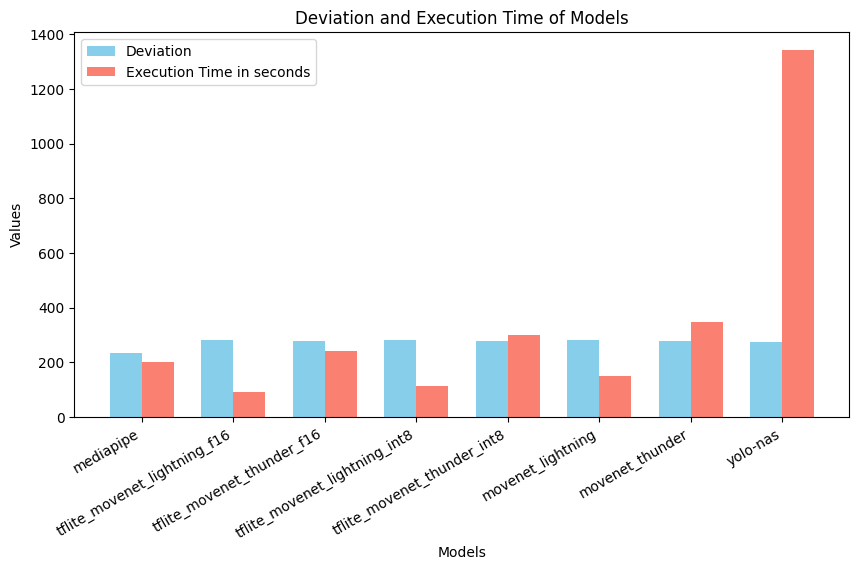

In [ ]:
import matplotlib.pyplot as plt

models_data = [
    {"model_name": "1", "deviation": 232.4, "execution_time": 202},
    {"model_name": "2", "deviation": 283.1, "execution_time": 91},
    {"model_name": "3", "deviation": 279.5, "execution_time": 241},
    {"model_name": "4", "deviation": 282.6, "execution_time": 112},
    {"model_name": "5", "deviation": 279.8, "execution_time": 300},
    {"model_name": "6", "deviation": 283.1, "execution_time": 149},
    {"model_name": "7", "deviation": 279.7, "execution_time": 348},
    {"model_name": "8", "deviation": 273.1, "execution_time": 1341},
]

# Extracting Data for Charting
model_names = ['mediapipe','tflite_movenet_lightning_f16','tflite_movenet_thunder_f16',\
              'tflite_movenet_lightning_int8', 'tflite_movenet_thunder_int8',\
              'movenet_lightning','movenet_thunder','yolo-nas']
qualities = [model["deviation"] for model in models_data]
execution_times = [model["execution_time"] for model in models_data]

# Constructing bar charts on a single graph
plt.figure(figsize=(10, 5))

bar_width = 0.35
bar_index = range(len(models_data))

plt.bar([i - bar_width/2 for i in bar_index], qualities, width=bar_width, color='skyblue', label='Deviation')
plt.bar([i + bar_width/2 for i in bar_index], execution_times, width=bar_width, color='salmon', label='Execution Time in seconds')

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Deviation and Execution Time of Models')
plt.xticks(bar_index, model_names, rotation = 30, ha = 'right')
plt.legend()

plt.show()